# Heart Disease Detection AI Model
This is a notebook describes the process and steps taken to train an algorithm to be able to detect whether a patient has heart disease or not.  
The algorithm that will be used is the __Random Forest Classifier algorithm__

> Steps being followed;
> 1. Get the data
> 2. Clean and transform the data (including encoding and scaling)
> 3. Fit the model
> 4. Test the model
> 5. Evaluate the model
> 6. Export the model

In [2]:
#import necessary packages that will be used
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

I'm making use of the heart disease dataset from https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/data/heart-disease.csv

In [3]:
heart_disease_raw_ds = pd.read_csv("./data/heart-disease.csv")
heart_disease_raw_ds.head(7)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


### Data Cleaning/Processing

**i. Handle missing vaues**

In [4]:
#checking for issin values
heart_disease_raw_ds.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

From the check above there are no missing values in the dataset.  
The dataset has only numerical features, hence, there is no case of categorical features to encode

**ii Seperate the test data from the training data**

In [5]:
#first, seperate the features (X) and the target (Y)
x = heart_disease_raw_ds.drop("target", axis=1)
y = heart_disease_raw_ds["target"] #becuase its the target variable is the result it should be put on the y variable

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=20) #the random state is defined to enable us do a reproducable outcome everytime (similar to defining the seed of a numpy random function)

In [7]:
type(y_test)

pandas.core.series.Series

**ii. Feature scaling using normalisation**

In [8]:
#import the scaler and column transformer from scikitlearn
from sklearn.preprocessing import MinMaxScaler #this performs normalisation
from sklearn.compose import ColumnTransformer

In [9]:
min_max_scaler = MinMaxScaler()
features = x.keys() #we are applying scaling to all the determinnant features

features_transformer = ColumnTransformer([("features_scaling", min_max_scaler, features)], remainder="passthrough") #transform the columns

In [10]:
#now transform the x_train features
x_train_transformed = features_transformer.fit_transform(x_train)

x_train_transformed[:5]#preview the transformed x_train features

array([[0.76744186, 1.        , 0.        , 0.29245283, 0.29223744,
        1.        , 0.5       , 0.74193548, 0.        , 0.03225806,
        0.5       , 0.5       , 1.        ],
       [0.6744186 , 1.        , 1.        , 0.48113208, 0.24429224,
        1.        , 0.        , 0.63709677, 0.        , 0.37096774,
        0.        , 0.        , 0.33333333],
       [0.74418605, 1.        , 0.        , 0.16981132, 0.19634703,
        0.        , 0.        , 0.49193548, 1.        , 0.01612903,
        1.        , 0.25      , 0.66666667],
       [0.13953488, 1.        , 1.        , 0.43396226, 0.16666667,
        0.        , 0.5       , 0.86290323, 1.        , 0.22580645,
        1.        , 0.        , 1.        ],
       [0.55813953, 0.        , 0.        , 0.71698113, 0.2260274 ,
        1.        , 0.        , 0.60483871, 1.        , 0.4516129 ,
        0.5       , 0.5       , 0.33333333]])

In [11]:
#transform the x_test data too
x_test_transformed = features_transformer.fit_transform(x_test)
x_test_transformed[:5] #preview the transformed

array([[0.8       , 1.        , 1.        , 0.475     , 0.51086957,
        1.        , 0.        , 0.75438596, 0.        , 0.35      ,
        0.5       , 0.25      , 0.5       ],
       [0.6       , 1.        , 1.        , 0.25      , 0.1884058 ,
        0.        , 0.        , 0.64912281, 0.        , 0.475     ,
        0.5       , 0.        , 1.        ],
       [0.44444444, 1.        , 0.66666667, 0.25      , 0.17028986,
        0.        , 1.        , 0.44736842, 0.        , 0.5       ,
        0.5       , 0.75      , 1.        ],
       [0.66666667, 1.        , 0.33333333, 0.5       , 0.28985507,
        0.        , 1.        , 0.66666667, 1.        , 0.        ,
        1.        , 0.        , 0.5       ],
       [0.8       , 0.        , 0.66666667, 0.5       , 1.        ,
        1.        , 0.        , 0.60526316, 0.        , 0.2       ,
        1.        , 0.25      , 0.5       ]])

### Model Fitting
> Including hyperparameter tuning

In [12]:
prediction_model = RandomForestClassifier(n_estimators=100, random_state=20) #lets tune the "random_state" hyper parameter to 20 since the samples were created with the same random state. For the "n_estimators" hyper parameter, it is by default 100 (n_estimators influce the accuracy of models (in some cases, the smaller the number, the more accurate it is (depending on the context)))
prediction_model.fit(x_train_transformed, y_train) #fit the model with the transformed features
model_prediction = prediction_model.predict(x_test_transformed) #test the model


In [13]:
#check the prediction
model_prediction[:5]

array([1, 0, 0, 1, 1])

Lets check the `prediction probability` (this is helpful for knowing the model's confidence level in each choice, als helpful for ROC curve evaluation)

In [14]:
heart_dis_predict_prob =  prediction_model.predict_proba(x_test_transformed)
heart_dis_predict_prob[:5]

array([[0.46, 0.54],
       [0.56, 0.44],
       [0.7 , 0.3 ],
       [0.49, 0.51],
       [0.25, 0.75]])

In [30]:
#lets check the accuracy at a glance from the source table by merging its result to that of the y_test data
model_pred_df = pd.DataFrame({
    "model_prediction": model_prediction
})

#merged all the DataFrames together and made sure the indices are reset (becuase we sampled randomly when splitting the train-test data) so that when they're compiled, there won't be any mismatch of rows or NaNs because of randomised indices
result_table = pd.concat([x_test.reset_index(drop=True),y_test.reset_index(drop=True),model_pred_df], axis=1)
result_table.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,model_prediction
0,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0,1
1,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1,0
2,49,1,2,120,188,0,1,139,0,2.0,1,3,3,0,0
3,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,1
4,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1,1


### Model evaluation

In [16]:
#quick evaluation
prediction_model.score(x_test_transformed, y_test)

0.6885245901639344

**Evaluation using SciKit Learn metrics functions**

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [18]:
print(classification_report(y_test, model_prediction))

              precision    recall  f1-score   support

           0       0.56      0.78      0.65        23
           1       0.83      0.63      0.72        38

    accuracy                           0.69        61
   macro avg       0.70      0.71      0.69        61
weighted avg       0.73      0.69      0.69        61



In [20]:
print(accuracy_score(y_test, model_prediction))

0.6885245901639344


From the evaluation above, there is a lot of deviatons from the true target value as the algorithm is only 68% accurate

#### Evaluating False Positive Rate using ROC curve

In [21]:
#get the positive probability part of the prediction array (i.e. the second column of the result from predict_proba() which represents the probability that the patient has heart disease)
positive_probs = heart_dis_predict_prob[:,1]
len(positive_probs)

61

In [22]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_test, positive_probs)#calculate and return the FPR (false positive rate), TPR (True positive rate), and threshold

fpr, tpr, threshold

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.04347826, 0.04347826,
        0.04347826, 0.04347826, 0.13043478, 0.13043478, 0.17391304,
        0.2173913 , 0.2173913 , 0.26086957, 0.30434783, 0.30434783,
        0.39130435, 0.39130435, 0.43478261, 0.43478261, 0.52173913,
        0.52173913, 0.56521739, 0.65217391, 0.73913043, 0.86956522,
        0.95652174, 1.        ]),
 array([0.        , 0.02631579, 0.05263158, 0.13157895, 0.18421053,
        0.26315789, 0.28947368, 0.34210526, 0.34210526, 0.44736842,
        0.5       , 0.52631579, 0.57894737, 0.60526316, 0.60526316,
        0.63157895, 0.68421053, 0.68421053, 0.71052632, 0.81578947,
        0.81578947, 0.89473684, 0.92105263, 0.97368421, 0.97368421,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        ]),
 array([ inf, 0.94, 0.89, 0.84, 0.83, 0.82, 0.81, 0.79, 0.76, 0.71, 0.67,
        0.62, 0.54, 0.53, 0.52, 0.51, 0.49

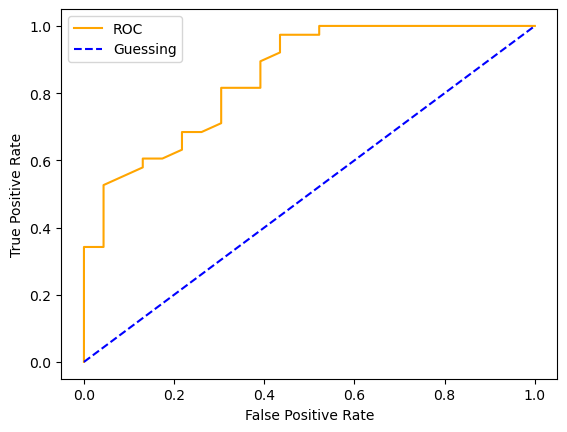

In [23]:
##Lets plot the ROC curve comparing the FPR to TPR (if curve is leaning towards the TPR size having bigger area under curve then its good)
plt.plot(fpr, tpr, c="orange", label="ROC")
plt.plot([0,1],[0,1],c="blue", linestyle="--", label="Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [24]:
#check the ROC AUC score following the visual seen
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, positive_probs)
print(f"Area under curve score: {auc_score}")

Area under curve score: 0.8495423340961099


The ROC area under curve score is 84%. Shows good prediction model

**Comparing Result to Expected Using Confusion Matrix**

In [29]:
from sklearn.metrics import confusion_matrix

conf_matrx = confusion_matrix(y_test, model_prediction)

print(conf_matrx)

[[18  5]
 [14 24]]


Visualising the matrix using heatmap (I'm using the sklearn quick matrix viz instead of using seasborn and customising manually)

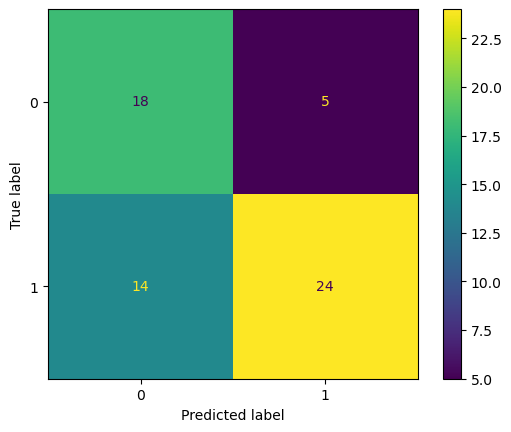

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, model_prediction)
plt.show()

**Evaluating with Precision, Recall, and F1 Score**
> This can also be automatically calculated at once when using classification_report() function

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(f"The Precision score of the model is: {precision_score(y_test, model_prediction)}")
print(f"The Recall score of the model is: {recall_score(y_test, model_prediction)}")
print(f"The F1 score of the model is: {f1_score(y_test, model_prediction)}")

The Precision score of the model is: 0.8275862068965517
The Recall score of the model is: 0.631578947368421
The F1 score of the model is: 0.7164179104477612


**Evaluating with Cross Validation Score**

In [33]:
from sklearn.model_selection import cross_val_score

k = 5 #5 fold

cv_result = cross_val_score(prediction_model, x, y, cv = 5)
cv_result

array([0.81967213, 0.91803279, 0.81967213, 0.78333333, 0.78333333])

In [34]:
import numpy as np

#calculate the cross validation accuracy by finding the mean
cross_val_accuracy = np.mean(cv_result)
print(f"The cross validation accuracy is: {np.round(cross_val_accuracy * 100, 2)}%")

The cross validation accuracy is: 82.48%


### Export the Model

In [26]:
import pickle

In [27]:
pickle.dump(prediction_model, open("./exported model/heart_disease_identifier_model.pkl", "wb")) #save the model by writing to the a pickle file. The "wb" parameter of the opn() function means "write binary". When you're loading a mdoel you use "rb" meaning "read binary"

I will either further tune the AI model or try another classifier model on this problem till the best result is attained